<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
            </font>
			<p></p>
			<font color=blue>
آمار و احتمال مهندسی
            </font>
			<br />
			<br />
پاییز ۱۳۹۷
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>
p-value
            </div>
		</font>
		<br />
		<div align=center>
شبنم شیخها، غزل ابراهیمی
        </div>
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>فهرست مطالب</h3>
			<ul style="margin-right: 0;">
                <li>
					<a href="#sec_intro">
                        مقدمه
                    </a>
				</li>
                <li>
					<a href="#sec_problem">
                        صورت مسئله
                    </a>
				</li>
                <li>
					<a href="#sec_t_test">
                         p-value
                    </a>
				</li>
                <li>
					<a href="#sec_jam_again">
بازگشت به مسئله‌ی افزایش خواب 
                    </a>
				</li>
                                <li>
					<a href="#sec_correct_pvalue">
p-value اصلاح شده 
                    </a>
				</li>
                                                <li>
					<a href="#more">
برای مطالعه
  </a>
				</li>
                <li>
					<a href="#sec_conc">
خلاصه و نتیجه‌گیری
                    </a>
				</li>
                <li>
					<a href="#sec_conc">
منابع
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
مقدمه
        </font>
		<p></p>
		<hr>
        	به عنوان یک دانشجو احتمالا شب‌زنده‌داری‌های متعدد و کم‌خوابی‌های شدید را تجربه کرده‌اید. فرض کنید دانشمندی ادعا میکند دارویی درست کرده‌است که میزان خواب افراد را افزایش می‌دهد. او برای اثبات این ادعا یک آزمون فرض اجرا می‌کند، سپس به شما اعلام می‌کند که نتایج مثبت است و دارو مؤثر است.            
            <br />
         	تا چه حد به حرف او اطمینان می‌کنید؟‌ برای اینکه بفهمید آیا واقعا درست می‌گوید یا نه چه مدرکی از او درخواست می‌کنید؟
            <br />
        	برای پاسخ به این سوالات، در بخش‌های پیش رو در رابطه با $p-value$ صحبت خواهیم کرد.             
            <br />
	</font>
</div>

<p></p>
<br />
<div id="sec_problem" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
صورت مسئله
        </font>
		<p></p>
		<hr>
        	دو مدل دارو برای افزایش خواب ارائه شده است. هر دو آنها روی ۱۰۰ نفر آزمایش شده‌اند. نتایج آزمایش دو دارو در دیتاست drugs قرار گرفته‌است. آن را بررسی می‌کنیم:
            </font>
</div>

In [1]:
library(readr)
drugs <- read_csv("drugs.csv")


Parsed with column specification:
cols(
  ID = col_integer(),
  drug1 = col_double(),
  drug2 = col_double()
)


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
	ستون‌های drug1 و drug2 به معنای میزان تغییر ساعات خواب تحت اثر داروی ۱ و ۲‌ و ستون ID کد فرد مورد آزمایش است.
    <br />
    <br />
    	ابتدا پکیج ggplot2 را لود می‌کنیم.
	</font>
</div>

In [2]:
library(ggplot2)
theme_set(theme_minimal())

<br />
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    حال می‌خواهیم توزیع ساعات خواب براساس داروی مورد استفاده را در یک نمودار مشاهده کنیم. برای اینکه از %>% و تابع gather() استفاده کنیم باید پکیج‌های زیر را لود کنیم:
        </font>
</div>

In [3]:
library(magrittr)
library(tidyr)

Attaching package: ‘tidyr’
The following object is masked from ‘package:magrittr’:
    extract



<br />
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    حالا دیتاست مورد نظر را می‌سازیم و نمودار آن را رسم می کنیم:
        </font>
</div>

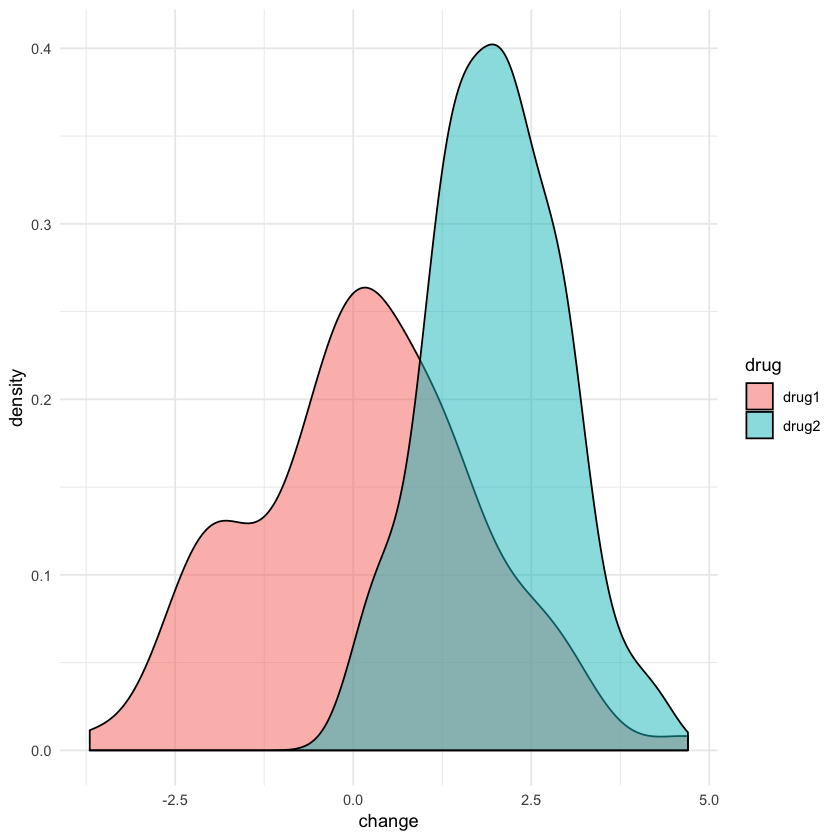

In [4]:
drugs.gather <- drugs %>% gather(key = "drug", value = "change", -ID)
ggplot(drugs.gather, aes(x = change, fill = drug)) + 
  geom_density(alpha = 0.5)

<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    	می‌خواهیم آزمون فرضی مناسب انتخاب کنیم. با توجه به نمودار توزیع داده‌ها، آزمون تی‌ را انتخاب می‌کنیم. اگر به جزوه‌ی مربوط به آزمون تی مراجعه کنید متوجه می‌شوید که فرض صفر و فرض دیگر بدین صورت می‌باشند:
        <br /><br>
        $H_0$: میانگین تغییر ساعات خواب برابر با صفر است. 
        <br>
$H_a$: میانگین تغییر ساعات خواب بیشتر از صفر است. 
    </font>
</div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    آزمون تی را اجرا می‌کنیم:
    </font>
</div>

In [5]:
t.test(drugs$drug1, alternative = "greater", mu = 0)
t.test(drugs$drug2, alternative = "greater", mu = 0)

	One Sample t-test
data:  drugs$drug1
t = 1.0043, df = 99, p-value = 0.1588
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -0.1032142        Inf
sample estimates:
mean of x 
    0.158 


	One Sample t-test
data:  drugs$drug2
t = 22.058, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 1.848525      Inf
sample estimates:
mean of x 
    1.999 


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
<br>
	حال دانشمند سازنده‌ی این داروها (داروسازان؟‌ :)) ) به ما می‌گوید هر دو دارو موثر هستند. سوالی که در مقدمه پرسیدیم را به یاد آورید. برای اینکه بفهمید آیا واقعا درست می‌گوید یا نه چه مدرکی از او درخواست می‌کنید؟‌آیا لزومی به مدلسازی وجود دارد؟
	</font>
</div>



<p></p>
<br />
<div id="sec_t_test" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
p-value
        </font>
		<hr>
       	برای فهم معنای p-value بهتر است ابتدا مفاهیم مرتبط پیشین را یادآوری کنیم. 
        اگر بر مفاهیم آزمون فرض، فرض صفر، درجه‌ی اهمیت و قدرت آزمون فرض تسلط دارید مستقیم از <a href = "#here"> اینجا </a> ادامه دهید.
        <br>
        <br>
        	یک <u><i>جامعه‌ی آماری </i></u> را در نظر بگیرید. مثلا مجموعه‌ی دانشجویانی که داروی خاصی را مصرف کرده‌اند، مجموعه‌ی مدت زمان‌هایی که طول کشیده تا یک پیتزافروشی پیتزا‌ها را به مشتریانش تحویل بدهد، مجموعه‌ی نتایح حاصل از پرتاب یک سکه و … . <br>
            	حال <i><u>ادعایی</u></i> در رابطه با این جوامع آماری را در نظر بگیرید. مثلا اینکه دارو موجب افزایش میانگین خواب دانشجویان شده، میانگین زمان تحویل پیتزا حداکثر ۳۰ دقیقه است، سکه‌ی پرتاب شده سکه‌ای عادی نیست و … . 
                <br>
                	برای آزمایش اینکه ادعای مطرح شده در رابطه با جامعه‌ی آماری موردنظر درست است یا نه از <i><u>آزمون فرض</u></i> استفاده می‌شود. بدین منظور، دو فرض مطرح می‌شود: ۱. فرض صفر ($null~hypothesis$) ۲. فرض دیگر ($alternate~ hypothesis$)         
                    <br>
                    	در انتخاب فرایض، دقت کنید که فرض صفر معمولا این است که اتفاقی خارج از معمول رخ نداده است. مثلا دارو در خواب دانشجویان تاثیری نگذاشته، میانگین تحویل پیتزا بیشتر از ۳۰ دقیقه است، سکه‌ی پرتاب شده سکه‌ای عادی است و … . فرض دیگر معمولا ادعایی است که میخواهیم درستی آن را اثبات کنیم. یعنی تفاوت <b>معنی‌داری</b> - که تنها بر پایه‌ی شانس نباشد - وجود دارد.
<br>
<u><i>درجه‌ی اهمیت</i></u> آزمون فرض یا $\alpha$ مقدار دلخواهی است که از قبل خودمان مشخص کرده‌ایم. این مقدار، احتمال خطای نوع اول است. قدرت آزمون فرض یا $\beta$ برابر با ۱ منهای احتمال خطای نوع دوم است. 
	</font>
</div>



<img src = "Type_I_and_Type_II_Error_Table.jpg">

<p></p>
<br />
<div id="here" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
	حال میرسیم به معنای $p-value$. $p-value$ برابر با احتمال این است که در صورتی که فرض صفر درست باشد، نتایجی حداقل به شدت داده‌ی مورد آزمایش مشاهده کنیم. عبارت “ حداقل به شدت “ بستگی به آزمون فرض دارد.
</font>
</div>

<p></p>
<br />
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
        	مثال‌های قبلی را به یاد آورید.
            <br>
            <ul>
            <li>
خواب دانشجویان
            </li>
        </ul>
        داده‌های در دسترس تغییرات خواب دانشجویان است. فرض صفر این است که میانگین این تغییرات صفر است (دارو مؤثر نبوده). فرض کنید میانگین داده‌ها را گرفته ایم و میانگین تغییرات برابر با ۰.۵ ساعت شده‌است. $p-value$ احتمال این است که در نمونه برداری‌های دیگر از همین جامعه‌ی آماری میانگین تغییرات، حداقل برابر با ۰.۵ ساعت باشد در حالی‌که دارو مؤثر نباشد.
        <br>  
        <ul>
            <li>
	زمان تحویل پیتزا
            </li>
        </ul>
        داده‌های در دسترس، مدت زمان طول کشیده تا تحویل پیتزا به مشتری است. فرض صفر این است که میانگین این زمان‌ها حداکثر ۳۰ دقیقه است. فرض کنید میانگین داده‌ها را گرفته‌ایم و میانگین زمان‌ها برابرا با ۵۰ دقیقه شده‌است. $p-value$ احتمال این است که در نمونه‌برداری‌های دیگر میانگین زمان‌ها، حداقل برابر ۵۰ دقیقه باشد در حالی‌که حداکثر زمان تحویل این پیتزا‌فروشی ۳۰ دقیقه باشد. 
        <br>
                <ul>
            <li>
پرتاب سکه
            </li>
        </ul>
        	داده‌های در دسترس، نتایج حاصل از ۱۰۰ پرتاب سکه (و حوصله‌ي فراوان یک انسان بیکار) است. فرض صفر این است که سکه عادی است (یعنی احتمال شیر و خط آمدن برابر است). فرض کنید تعداد پرتاب‌های شیر ۸۰ عدد شده‌باشد. $p-value$ احتمال این است که در آزمایش‌های دیگر تعداد پرتاب‌های شیر حداقل ۸۰ عدد باشد، در حالی‌که سکه عادی باشد. 
</font>            
</div>

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
     <font color=red size=5>
        نکته.
        </font>
       در یک دنیا‌ی ایده‌آل ما می‌توانیم یک نمونه‌ي کاملا تصادفی از جامعه‌ی آماری تهیه کنیم، بهترین تست مربوط به آن را انجام دهیم و به نتیجه‌ای قطعی برسیم. ولی متاسفانه در دنیای واقعی چنین چیزی امکان‌پذیر نمی‌باشد. ولی می‌توانیم مراحل کارمان را به نحوی بهینه‌سازی کنیم که نتیجه‌ی نهایی ما دارای کمترین سطح عدم قطعیت باشد.  
     </font>   
    </div>

<p></p>
<div id="here" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    <br> <br>
         <img src = "p_value.jpg">
        <br>
        <br> <br> 
      	$p-value$ اینکه چقدر نمونه‌ی تصادفی جمع‌آوری شده با درست بودن فرض صفر در رابطه با جامعه‌ي آماری هم‌خوانی دارد را ارزیابی می‌کند. 
        <br>
        	دقت کنید که $p-value$ 
<b>به هیچ عنوان احتمال بروز خطا به علت رد کردن فرض صفر در حالی‌که درست باشد نیست. </b> (خطای نوع اول : $\alpha$) 
	این یک تصور اشتباه بسیار رایج در رابطه با تفسیر $p-value$ است. چرا این تصور، اشتباه است؟ 
</div>

<p></p>
<div id="here" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    اولاً، $p-value$ بر فرض درست بودن فرض صفر برای جامعه‌ی آماری، و شانسی بودن تفاوت مشاهده شده در نمونه‌ی آماری محاسبه می‌شود. به همین دلیل $p-value$ نمی‌تواند احتمال درست یا غلط بودن فرض صفر را به ما بگوید. 
    <br>
    دوماً، ما از روی $p-value$ بسیار پایین می‌توانیم بفهمیم که احتمال وقوع نمونه‌ی آماری جمع آوری شده، در صورتی که فرض صفر در رابطه با جامعه‌ی آماری صحیح باشد، بسیار کم است. اما نمی‌توانیم صرفا از روی آن بفهمیم که کدام یک از حالات زیر برقرار است:
    <br>
    الف) فرض صفر درست است، ولی نمونه‌ی آماری به درستی نمونه‌گیری نشده و غیر معمول است.
    <br>
    	ب) فرض صفر غلط است.
        <br>
        	تشخیص اینکه کدام حالت برقرار است نیازمند اطلاعات در رابطه‌ با پیش‌زمینه‌ی موضوع و انجام آزمایش‌های بعدی است.
</font>        
</div>

<p></p>
<div id="here" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    سؤالی که پیش می‌آید این است که چه $p-value$ای مناسب است؟به یاد آورید که $\alpha$ به معنای درجه‌ی اهمیت است و قبل از انجام آزمون فرض مقدار آن را به دلخواه تعیین می‌کنیم. به صورت کلی $\alpha$ را ۵، ۱ یا ۰.۱ انتخاب می‌کنند. 
<br>
دقت کنید که $p-value$ احتمال است بنابراین همواره مقدار بین صفر تا ۱ می‌گیرد.
<br>
	به صورت زیر می‌توان دقیق‌تر مقادیر $p-value$ را تفسیر کرد:
    <br>
    <ol>
            <li>
$p-value$ بسیار کم (خیلی کمتر از $\alpha$) مدرکی قوی علیه صحت فرض صفر است. در این صورت فرض صفر را رد می‌کنیم.
            </li>
            <li>
$p-value$ بسیار بالا (خیلی بیشتر از $\alpha$) مدرکی ضعیف علیه صحت فرض صفر است. در این صورت موفق به رد کردن فرض صفر نمی‌شویم. 
            </li>
            <li>
$p-value$ای که بسیار نزدیک به $\alpha$ باشد را می‌توان به هر دو صورت تفسیر کرد. 
            </li>
        </ol>
</font>
</div>

<p></p>
<br />
<div id="sec_jam_again" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
بازگشت به مسئله‌ی افزایش خواب
        </font>
		<p></p>
		<hr>
	فرض صفر این بود که داروها مؤثر نیستند. مجدد آزمون تی را روی داده‌ها اجرا می‌کنیم. 
	</font>
</div>

In [35]:
t.test(drugs$drug1, alternative = "greater", mu = 0)
t.test(drugs$drug2, alternative = "greater", mu = 0)

	One Sample t-test
data:  drugs$drug1
t = 1.0043, df = 99, p-value = 0.1588
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -0.1032142        Inf
sample estimates:
mean of x 
    0.158 


	One Sample t-test
data:  drugs$drug2
t = 22.058, df = 99, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 1.848525      Inf
sample estimates:
mean of x 
    1.999 


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>در داروی اول $p-value$ برابر با $0.1588$ و در داروی دوم کمتر از $2.2 \times 10^{-16}$ شده است. با توجه به صحبت‌هایی که در قسمت قبل کردیم، مدارک کافی برای رد اینکه داروی اول مؤثر نیست نداریم. ولی مدارک بسیار کافی برای رد اینکه داروی دوم مؤثر نیست داریم. یعنی می‌توانیم بگوییم که داروی دوم موجب افزایش ساعات خواب مصرف‌کنندگان آن می‌شود. 
	</font>
</div>

<p></p>
<br/>
<div id="sec_correct_pvalue" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
p-value اصلاح شده
        </font>
		<p></p>
		<hr>
در مثال‌های بالا $p-value$ محاسبه شده برای یک آزمون را بدست آوردیم. در اینجا می‌خواهیم $p-value$ را برای زمانی که مجموعه‌ای از آزمون‌ها داریم بدست آوریم.
<br>
فرض کنید که ۱۰۰۰ ژن داریم و می‌خواهیم تاثیر داشتن و یا عدم تاثیر هر یک را در بیماری بررسی کنیم. 
<br>
اگر $p-value$  ۰.۰۵  باشد، آنگاه ۵ درصد احتمال خطا در قبول یک ژن وجود دارد. حال اگر ۱۰۰ ژن را امتحان کنیم، ۵ ژن به عنوان نمونه‌هایی برای رد فرض صفر انتخاب می‌شوند هرچند فرض صفر درست باشد. اگر ۱۰۰۰۰ ژن را امتحان کنیم ان‌گاه ۵۰۰ ژن را دارای این ویژگی می‌شوند.
        <br>
بنابراين مهم است ارزش $p-value$ هر ژن در هنگام انجام آزمون آماري بر روي يک گروه يا ژن ها را اصلاح کنیم.
        <br>
برای این‌کار چند روش وجود دارد که در اینجا روش بونفرونی را به صورت مفصل توضیح می‌دهیم و روش‌های دیگر را می‌توانید در قسمت برای مطالعه، مطالعه کنید.
        <br>
        <ul>
            <li>
روش بونفرونی: در این روش $p-value$ هر یک از ژن‌ها را به صورت جدا بدست ‌می‌آوریم و سپس در تعداد ژن‌های نمونه آماری ضرب می‌کنیم، اگر همچنان مقدار آن از $\alpha$ کمتر باشد آن‌گاه آن ژن معنا دار است و می‌توانیم فرض صفر را برای آن رد کنیم
$$corrected \ p-value = p-value \times n \left(number of genes in test\right) < \alpha $$
    </li>
    <br>
        </ul>    
</font>
</div>

 <p></p>
<br/>
<div id="more" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#008000 size=6>
برای مطالعه
</font>
		<p></p>
 <li>
روش Bonferroni-Holm: این روش در واقع یک روش پله‌پله از روش Bonferroni است.ابتدا ژن‌ها را نسبت به $p-value$ مرتب می‌کنیم (از کم به زیاد). هر بار $p-value$ یک ژن را در نظر می‌گیریم و آن را در تعداد ژن‌هایی که باقی مانده‌است ضرب می‌کنیم و سپس این ژن را از لیست ژن‌ها کنار می‌گذاریم.  $$corrected \ p-value\ first\ gene = p-value \times n < \alpha $$
$$corrected \ p-value\ second\ gene = p-value \times n-1 < \alpha $$
$$corrected \ p-value\ third\ gene = p-value \times n-2 < \alpha $$
       </li>
       <br>
مثال:
فرض کنید تعداد ژن‌ها 1000 و $\alpha = 0.05$ است.
<img src = "table1.jpg">
<br>
حال $p-value$ اصلاح شده هر یک از ژن‌ها را بدست می‌آوریم.
$$corrected \ p-value\ gene\ A = 0.00002 \times 1000 = 0.002 < 0.005 \Rightarrow\ Gene\ is\ significant $$
$$corrected \ p-value\ gene\ B = 0.00004 \times 999 = 0.039 < 0.005 \Rightarrow\ Gene\ is\ significant $$
$$corrected \ p-value\ gene\ C = 0.00009  \times 998 = 0.0898 > 0.005 \Rightarrow\ Gene\ is\ not\ significant $$
<br>
<li>
روش Benjamini & Hochberg False Discovery Rate: در این روش نیز مانند روش قبل ابتدا ژن‌ها را بر اساس $p-value$ از کم به زیاد مرتب می‌کنیم. سپس برای بدست آوردن $p-value$ های اصلاح شده به این صورت عمل می‌کنیم که ابتدا ژن با بیشترین $p-value$ را انتخاب می‌کنیم و به همین ترتیب پیش می‌رویم و فرمول $p-value$ اصلاح شده را به صورت زیر می‌نویسیم. 
</li>
$$corrected \ p-value first gene = p-value \times n < \alpha $$
$$corrected \ p-value second gene = p-value \frac{n}{n-1} < \alpha $$
$$corrected \ p-value third gene = p-value \frac{n}{n-2} < \alpha $$
<br>
مثال: فرض کنید تعداد ژن‌ها 1000 است و $\alpha = 0.05$ است.
<br>
حال $p-value$ اصلاح شده هر یک از ژن‌ها را بدست می‌آوریم.
<img src = "table2.jpg">
<br>
$$corrected \ p-value\ gene\ A\  > 0.05 \Rightarrow Gene\ A\ is\ not\ significant  $$
$$corrected \ p-value\ gene\ B\  = \frac{1000}{999} 0.04 = 0.04004 < 0.05  \Rightarrow Gene\ B\ is\ significant  $$
$$corrected \ p-value\ gene\ C\  = \frac{1000}{998} 0.01 = 0.01002 < 0.05 \Rightarrow Gene\ C\ is\ significant  $$
    </ul>
        </font>
</div>

<p></p>
<br/>
<div id="sec_conc" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
خلاصه و نتیجه‌گیری
        </font>
		<p></p>
		<hr>
        در این بخش با موارد زیر آشنا شدیم:
        <ul>
            <li>
ساعات خواب دانشجویان 
            </li>
            <li>
معنای $p-value$ 
            </li>
            <li>
نحوه‌ی تفسیر $p-value$
            </li>
            <li>
اشتباهات رایج در رابطه با $p-value$
            </li>
            <li>
پیاده سازی در R
            </li>
            <li>
                p-value اصلاح شده و روش‌های آن
            </li>
        </ul>
	</font>
</div>

<p></p>
<br/>
<div id="sec_refs" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
منابع
        </font>
		<hr>       
        <ul>
            <li>
https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/
            </li>
            <li>
https://www.statsdirect.com/help/basics/p_values.htm
            </li>
            <li>
http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values
            </li>
             <li>
https://www.students4bestevidence.net/p-value-in-plain-english-2/ 
            </li>
            <li>
                http://nebc.nerc.ac.uk/courses/GeneSpring/GS_Mar2006/Multiple%20testing%20corrections.pdf
            </li>
        </ul>
	</font>
</div>